In [1]:
#@title Install Selenium_Profiles

# install
!apt update
!pip uninstall -y selenium_profiles
!pip install --no-cache-dir selenium_profiles>=2.2.4.6
!pip install google-colab-shell # free shell

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:13 https://develo

In [ ]:
#@title Free shell
from google_colab_shell import getshell
getshell()

In [2]:
#@title Install Chrome
from selenium_profiles.utils.installer import install_chromedriver
from selenium_profiles.utils.colab_utils import restart_runtime
install_chromedriver()

In [4]:
#@title Start actual driver
from selenium_profiles.driver import driver as mydriver
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen # virtual display

mydriver = mydriver()
display = display()

display.start_display()
driver = mydriver.start(profiles.Windows(), uc_driver=False)  # or .Android

/usr/local/lib/python3.8/dist-packages/selenium_profiles/driver.py:38: UserWarning: Google-colab doesn't work with sandbox enabled yet, disabling..
  warnings.warn('Google-colab doesn\'t work with sandbox enabled yet, disabling..')
/usr/local/lib/python3.8/dist-packages/selenium_profiles/scripts/profiles.py:13: UserWarning: More likely to get detected with sandbox set to False!
  warnings.warn('More likely to get detected with sandbox set to False!')


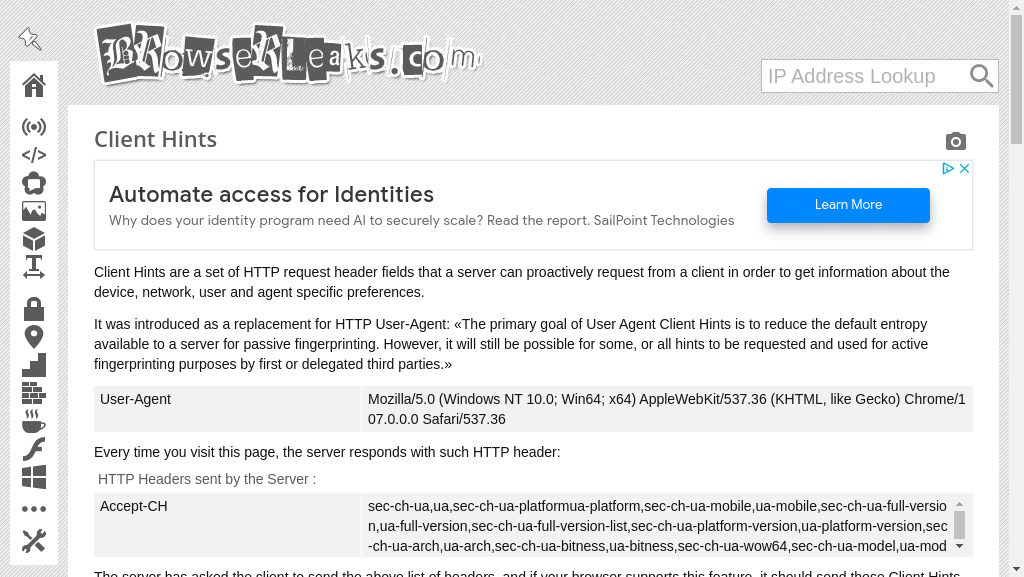

In [5]:
#@title Get URL
driver.get('https://browserleaks.com/client-hints')  # test client hints
showscreen(driver)

In [ ]:
#@title Quit driver
driver.quit()
display.stop_display()